### Libraries

In [354]:
import random
import math
import matplotlib.pyplot as plt

### Cost Function

In [355]:
def cost_function(D, F, Q, SM, WD):
    # Coefficients
    a1 = 0.5  # Weight for irrigation duration
    a2 = 0.3  # Weight for irrigation frequency
    a3 = 0.2  # Weight for flow rate
    a4 = 0.7  # Weight for soil moisture
    a5 = 0.3  # Weight for weather data

    # Define constraints
    min_duration = 2  # Minimum allowable irrigation duration (hours)
    max_duration = 8  # Maximum allowable irrigation duration (hours)
    min_frequency = 12  # Minimum allowable irrigation frequency (hours)
    max_frequency = 36  # Maximum allowable irrigation frequency (hours)
    max_flow_rate = 2.0  # Maximum allowable flow rate (L/s)

    # Calculate cost components
    # Change the term related to D to linear
    cost_duration = a1 * (D / max_duration)  # Penalize long durations
    cost_frequency = a2 *((F - min_frequency) / (max_frequency - min_frequency))  # Penalize low frequency
    cost_flow_rate = a3 * ((Q) / max_flow_rate)  # Penalize high flow rate
    # Change the term related to SM to exponential
    cost_soil_moisture = a4 * math.exp(1 - SM)  # Penalize dry soil
    # Change the term related to WD to exponential
    cost_weather_data = a5 * math.exp(1 - WD)  # Penalize unfavorable weather

    # Calculate the total cost
    total_cost = cost_duration + cost_frequency + cost_flow_rate + cost_soil_moisture + cost_weather_data

    return total_cost

### Black-hole

In [356]:


def black_hole_algorithm_with_plot(iterations, lower_bounds, upper_bounds, num_black_holes, num_stars):
    # Initialize the best solution and best cost
    best_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
    best_cost = cost_function(*best_solution)

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        # Generate black holes and stars in the search space
        black_holes = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(num_black_holes)]
        stars = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(num_stars)]

        # Calculate costs for black holes and stars
        black_hole_costs = [cost_function(*bh) for bh in black_holes]
        star_costs = [cost_function(*star) for star in stars]

        # Update the best solution if a black hole is better
        if min(black_hole_costs) < best_cost:
            best_cost = min(black_hole_costs)
            best_solution = black_holes[black_hole_costs.index(min(black_hole_costs))]

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(best_cost)

    # Visualize the optimization progress
    
    return best_solution, best_cost, iteration_list, cost_list

# Set the parameters for BHO
num_black_holes = 5
num_stars = 20
iterations = 1000

# Call the BHO algorithm
best_solution, best_cost, iteration_list, cost_list = black_hole_algorithm_with_plot(iterations, lower_bounds, upper_bounds, num_black_holes, num_stars)


### GWO

In [357]:

# Grey Wolf Optimization algorithm for optimization with plotting
def grey_wolf_optimization_with_plot(iterations, lower_bounds, upper_bounds):
    # Initialize the best solution and best cost
    best_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
    best_cost = cost_function(*best_solution)

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        # Generate a random solution in the search space
        candidate_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
        candidate_cost = cost_function(*candidate_solution)

        # Update the best solution if the candidate is better
        if candidate_cost < best_cost:
            best_solution = candidate_solution
            best_cost = candidate_cost

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(best_cost)

    return best_solution, best_cost, iteration_list, cost_list

# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed


### PSO

In [358]:
# Particle Swarm Optimization algorithm for optimization with plotting
def particle_swarm_optimization_with_plot(iterations, population_size, lower_bounds, upper_bounds, inertia_weight, cognitive_weight, social_weight):
    # Initialize the population
    population = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(population_size)]

    # Initialize velocities
    velocities = [[0] * len(lower_bounds) for _ in range(population_size)]

    # Initialize personal best positions and costs
    personal_best_positions = population.copy()
    personal_best_costs = [cost_function(*individual) for individual in population]

    # Find the global best position and cost
    global_best_index = personal_best_costs.index(min(personal_best_costs))
    global_best_position = personal_best_positions[global_best_index]
    global_best_cost = personal_best_costs[global_best_index]

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        for i in range(population_size):
            for j in range(len(lower_bounds)):
                # Update velocity
                cognitive_term = cognitive_weight * random.random() * (personal_best_positions[i][j] - population[i][j])
                social_term = social_weight * random.random() * (global_best_position[j] - population[i][j])
                velocities[i][j] = inertia_weight * velocities[i][j] + cognitive_term + social_term

                # Update position
                population[i][j] += velocities[i][j]

                # Clip to the search space bounds
                population[i][j] = max(min(population[i][j], upper_bounds[j]), lower_bounds[j])

            # Calculate the cost for the updated position
            cost = cost_function(*population[i])

            # Update personal best if needed
            if cost < personal_best_costs[i]:
                personal_best_positions[i] = population[i].copy()
                personal_best_costs[i] = cost

                # Update global best if needed
                if cost < global_best_cost:
                    global_best_position = personal_best_positions[i].copy()
                    global_best_cost = cost

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(global_best_cost)

    return global_best_position, global_best_cost, iteration_list, cost_list

# Define search space bounds for each parameter


# PSO parameters
iterations = 100
population_size = 50
inertia_weight = 0.5
cognitive_weight = 1.5
social_weight = 1.5


### GOA

In [359]:
def gravitational_optimization_algorithm_with_plot(iterations, population_size, lower_bounds, upper_bounds):
    # Initialize the population
    population = [[random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)] for _ in range(population_size)]

    # Initialize gravitational constant
    G = 6.67430e-11  # Universal gravitational constant

    # Lists to store optimization progress for plotting
    iteration_list = []
    cost_list = []

    for iteration in range(iterations):
        # Calculate the gravitational forces between individuals
        forces = []
        for i in range(population_size):
            force_i = [0] * len(lower_bounds)
            for j in range(population_size):
                if i != j:
                    r = sum([(population[i][k] - population[j][k]) ** 2 for k in range(len(lower_bounds))]) ** 0.5
                    for k in range(len(lower_bounds)):
                        force_i[k] += (G * population[i][k] * population[j][k]) / (r + 1e-10)
            forces.append(force_i)

        # Update positions based on the gravitational forces
        for i in range(population_size):
            for j in range(len(lower_bounds)):
                population[i][j] += forces[i][j]

                # Clip to the search space bounds
                population[i][j] = max(min(population[i][j], upper_bounds[j]), lower_bounds[j])

        # Calculate the cost for the updated positions
        costs = [cost_function(*individual) for individual in population]

        # Find the best solution in this iteration
        best_index = costs.index(min(costs))
        best_solution = population[best_index]
        best_cost = costs[best_index]

        # Store progress data for plotting
        iteration_list.append(iteration)
        cost_list.append(best_cost)

    return best_solution, best_cost, iteration_list, cost_list



### ACO

In [360]:
def ant_colony_optimization_with_plot(num_ants, num_iterations, evaporation_rate, pheromone_weight, heuristic_weight, lower_bounds, upper_bounds):
    num_parameters = len(lower_bounds)

    # Initialize pheromone levels on each parameter
    pheromone_levels = [1.0] * num_parameters

    # Lists to store optimization progress for plotting
    iteration_list = []
    best_cost_list = []

    # Initialize the best solution and cost
    best_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
    best_cost = cost_function(*best_solution)

    for iteration in range(num_iterations):
        # Initialize ants
        ants = []
        for _ in range(num_ants):
            ant_solution = [random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)]
            ants.append(ant_solution)

        # Evaluate the fitness (cost) of each ant's solution
        fitness_scores = [cost_function(*ant) for ant in ants]

        # Update the best solution if a better one is found
        min_fitness = min(fitness_scores)
        if min_fitness < best_cost:
            best_cost = min_fitness
            best_solution = ants[fitness_scores.index(min_fitness)]

        # Update pheromone levels
        for i in range(num_parameters):
            pheromone_delta = 0.0
            for ant, fitness in zip(ants, fitness_scores):
                pheromone_delta += (1.0 / (fitness + 1e-10)) * (ant[i] - best_solution[i])
            pheromone_levels[i] = (1.0 - evaporation_rate) * pheromone_levels[i] + pheromone_delta

        # Store progress data for plotting
        iteration_list.append(iteration)
        best_cost_list.append(best_cost)

    return best_solution, best_cost, iteration_list, best_cost_list


### Results

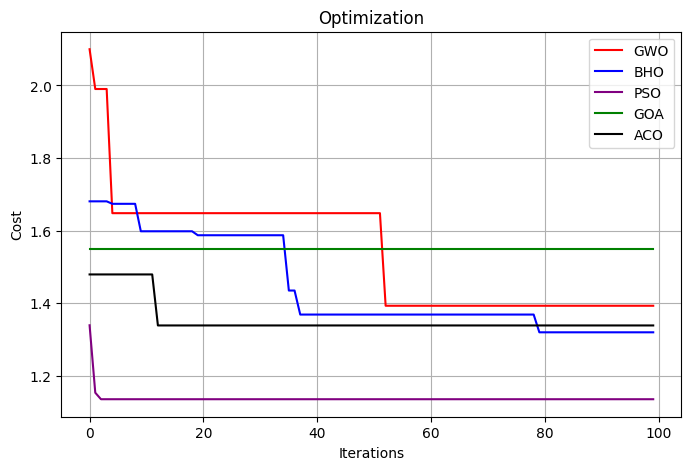

In [361]:
#print("Optimal Parameters:", best_params)
#print("Minimum Cost:", min_cost)
#print("Optimal Parameters:", best_params)
#print("Minimum Cost:", min_cost)

plt.figure(figsize=(8, 5))

best_params, min_cost, iterations, costs = grey_wolf_optimization_with_plot(iterations=100, lower_bounds=lower_bounds, upper_bounds=upper_bounds)
plt.plot(iterations, costs,color = 'red', label = 'GWO')

best_params, min_cost, iterations, costs = black_hole_algorithm_with_plot(iterations=100,num_black_holes=5,num_stars=40, lower_bounds=lower_bounds, upper_bounds=upper_bounds)
plt.plot(iterations, costs, color = 'blue', label = 'BHO')


# PSO parameters
iterations = 100
population_size = 50
inertia_weight = 0.9
cognitive_weight = 1.5
social_weight = 1.5
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed
best_params, min_cost, iterations, costs = particle_swarm_optimization_with_plot(iterations, population_size, lower_bounds, upper_bounds, inertia_weight, cognitive_weight, social_weight)
plt.plot(iterations, costs, color = 'purple', label = 'PSO')


# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# GOA parameters
iterations = 100
population_size = 50

# Run the Gravitational Optimization Algorithm to find the optimal parameters and plot the progress
best_params, min_cost, iterations, costs = gravitational_optimization_algorithm_with_plot(iterations, population_size, lower_bounds, upper_bounds)
plt.plot(iterations, costs, color = 'green', label = 'GOA')


# Define search space bounds for each parameter
lower_bounds = [2, 12, 0.1, 0, 0]  # Adjust these bounds as needed
upper_bounds = [8, 36, 2.0, 1, 1]  # Adjust these bounds as needed

# Run the Ant Colony Optimization algorithm to find the optimal parameters and plot the progress
best_params, min_cost, iterations, costs = ant_colony_optimization_with_plot(num_ants=20, num_iterations=100, evaporation_rate=0.1, pheromone_weight=1.0, heuristic_weight=1.0, lower_bounds=lower_bounds, upper_bounds=upper_bounds)
plt.plot(iterations, costs, color = 'black', label= 'ACO' )
# Output the results
#print("Optimal Parameters:", best_params)
#print("Minimum Cost:", min_cost)

plt.title("Optimization")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.legend()
plt.show(True)